In [1]:
import numpy as np 
import pandas as pd
from pprint import pprint

In [2]:
def plot_confusion_matrix(cm):
    import matplotlib.pyplot as plt
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['No Default','Default']
    plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [4]:
data = pd.read_csv('credit-card-default.csv')
print(data.shape)
print(data.defaulted.value_counts())

(30000, 25)
0    23364
1     6636
Name: defaulted, dtype: int64


In [5]:
y = data['defaulted']
X = data.drop(['defaulted',],axis=1)

In [7]:
X = pd.get_dummies(X,drop_first=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Accuracy of Logit on test is: 0.8090666666666667


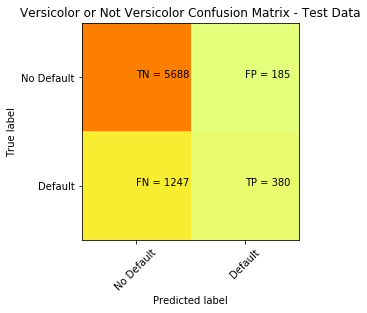

In [35]:
steps = [('scaler',StandardScaler()),
        ('logistic',LogisticRegression())]

pipeline = Pipeline(steps)

# parameters = {'logistic__C': np.logspace(-4, 4, 3)}

# cv = GridSearchCV(pipeline,cv=3)

pipeline.fit(X_train,y_train)

logit_pred = pipeline.predict(X_test)
print('Accuracy of Logit on test is:',accuracy_score(y_test,logit_pred))

cm = confusion_matrix(y_test,logit_pred)

plot_confusion_matrix(cm)

In [31]:
cv.best_params_

{'logistic__C': 10000.0}

Accuracy of L2 Regularization on test is: 0.7984


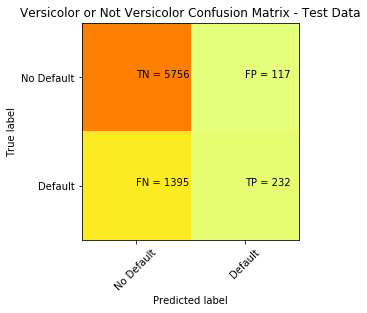

In [26]:
steps = [('scaler',StandardScaler()),
        ('ridge',RidgeClassifier())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'ridge__alpha':np.logspace(-4,0,50),'ridge__fit_intercept':['true','false'],
             'ridge__solver' : ['auto', 'lsqr',  'svd']

}

cv = GridSearchCV(pipeline,parameters,cv=3)

cv.fit(X_train,y_train)

l2_pred = cv.predict(X_test)
print('Accuracy of L2 Regularization on test is:',accuracy_score(y_test,l2_pred))

cm = confusion_matrix(y_test,l2_pred)

plot_confusion_matrix(cm)

In [23]:
cv.best_params_

{'ridge__alpha': 0.0001,
 'ridge__fit_intercept': 'true',
 'ridge__solver': 'lsqr'}

In [15]:
np.logspace(-4,0,50)

array([1.00000000e-04, 1.20679264e-04, 1.45634848e-04, 1.75751062e-04,
       2.12095089e-04, 2.55954792e-04, 3.08884360e-04, 3.72759372e-04,
       4.49843267e-04, 5.42867544e-04, 6.55128557e-04, 7.90604321e-04,
       9.54095476e-04, 1.15139540e-03, 1.38949549e-03, 1.67683294e-03,
       2.02358965e-03, 2.44205309e-03, 2.94705170e-03, 3.55648031e-03,
       4.29193426e-03, 5.17947468e-03, 6.25055193e-03, 7.54312006e-03,
       9.10298178e-03, 1.09854114e-02, 1.32571137e-02, 1.59985872e-02,
       1.93069773e-02, 2.32995181e-02, 2.81176870e-02, 3.39322177e-02,
       4.09491506e-02, 4.94171336e-02, 5.96362332e-02, 7.19685673e-02,
       8.68511374e-02, 1.04811313e-01, 1.26485522e-01, 1.52641797e-01,
       1.84206997e-01, 2.22299648e-01, 2.68269580e-01, 3.23745754e-01,
       3.90693994e-01, 4.71486636e-01, 5.68986603e-01, 6.86648845e-01,
       8.28642773e-01, 1.00000000e+00])